In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score # this indicator for validity of model is applied for regressors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/World University Rankings.csv')
df

,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,closed,unaccredited,overall_score
0,University of Oxford,96.6,100.0,99.0,98.7,97.5,master_account,0,United Kingdom,"21,750",10.9,42%,49:51:00,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,98.5
1,Stanford University,99.0,97.8,99.6,100.0,87.0,private,0,United States,"14,517",6.4,23%,47:53:00,"Computer Science,Communication & Media Studies...",False,False,98
2,Massachusetts Institute of Technology,98.6,96.2,99.7,100.0,93.8,private,0,United States,"11,085",8.0,33%,41:59:00,"Architecture,Economics & Econometrics,Archaeol...",False,False,97.9
3,Harvard University,97.7,99.9,99.4,84.2,90.8,private,0,United States,"20,050",9.0,25%,51:49:00,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,97.8
4,University of Cambridge,95.8,100.0,98.0,87.9,97.4,master_account,0,United Kingdom,"20,565",11.5,38%,48:52:00,Politics & International Studies (incl Develop...,False,False,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,Zarqa University,NaN,NaN,NaN,NaN,NaN,master_account,0,Jordan,"5,881",17.0,35%,60:40:00,"General Engineering,Civil Engineering,Electric...",False,False,NaN
2669,Zhetysu University,NaN,NaN,NaN,NaN,NaN,master_account,0,Kazakhstan,"4,872",18.2,0%,66:34:00,"History, Philosophy & Theology,Psychology,Lang...",False,False,NaN
2670,Zhytomyr Polytechnic State University,NaN,NaN,NaN,NaN,NaN,master_account,0,Ukraine,"4,454",16.1,1%,40 : 60,"Law,Economics & Econometrics,Politics & Intern...",False,False,NaN
2671,Ziane Achour University of Djelfa,NaN,NaN,NaN,NaN,NaN,master_account,0,Algeria,"31,103",28.5,0%,55:45:00,"Architecture,Agriculture & Forestry,Biological...",False,False,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          2673 non-null   object 
 1   scores_teaching               1904 non-null   float64
 2   scores_research               1904 non-null   float64
 3   scores_citations              1904 non-null   float64
 4   scores_industry_income        1904 non-null   float64
 5   scores_international_outlook  1904 non-null   float64
 6   record_type                   2673 non-null   object 
 7   member_level                  2673 non-null   int64  
 8   location                      2673 non-null   object 
 9   stats_number_students         2673 non-null   object 
 10  stats_student_staff_ratio     2673 non-null   float64
 11  stats_pc_intl_students        2673 non-null   object 
 12  stats_female_male_ratio       2580 non-null   object 
 13  sub

In [ ]:
df= df.select_dtypes(include=['number'])
df

,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,member_level,stats_student_staff_ratio
0,96.6,100.0,99.0,98.7,97.5,0,10.9
1,99.0,97.8,99.6,100.0,87.0,0,6.4
2,98.6,96.2,99.7,100.0,93.8,0,8.0
3,97.7,99.9,99.4,84.2,90.8,0,9.0
4,95.8,100.0,98.0,87.9,97.4,0,11.5
...,...,...,...,...,...,...,...
2668,NaN,NaN,NaN,NaN,NaN,0,17.0
2669,NaN,NaN,NaN,NaN,NaN,0,18.2
2670,NaN,NaN,NaN,NaN,NaN,0,16.1
2671,NaN,NaN,NaN,NaN,NaN,0,28.5


In [ ]:
df=df.dropna()
df

,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,member_level,stats_student_staff_ratio
0,96.6,100.0,99.0,98.7,97.5,0,10.9
1,99.0,97.8,99.6,100.0,87.0,0,6.4
2,98.6,96.2,99.7,100.0,93.8,0,8.0
3,97.7,99.9,99.4,84.2,90.8,0,9.0
4,95.8,100.0,98.0,87.9,97.4,0,11.5
...,...,...,...,...,...,...,...
1899,19.5,11.7,34.5,36.0,20.4,0,13.4
1900,22.0,12.4,17.6,59.3,38.8,0,27.5
1901,23.9,8.6,26.8,16.4,38.1,0,8.0
1902,16.9,10.5,28.8,23.1,30.6,0,16.3


In [ ]:
df.describe()

,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,member_level,stats_student_staff_ratio
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,29.060662,23.416176,52.189706,47.057405,49.907143,0.684349,18.671008
std,13.967201,16.697923,25.071342,26.150454,21.828249,2.463746,11.072058
min,9.400000,4.600000,3.400000,15.600000,16.100000,0.000000,0.300000
25%,19.400000,11.800000,30.400000,22.275000,31.975000,0.000000,12.300000
50%,25.800000,17.250000,52.400000,41.050000,45.300000,0.000000,16.300000
75%,34.500000,29.900000,73.225000,68.200000,65.400000,0.000000,22.025000
max,99.000000,100.000000,99.700000,100.000000,98.800000,11.000000,199.900000


In [ ]:
X = df.loc[:, df.columns != 'scores_teaching']
Y = df['scores_teaching']

In [ ]:
df.columns

Index(['scores_teaching', 'scores_research', 'scores_citations',
       'scores_industry_income', 'scores_international_outlook',
       'member_level', 'stats_student_staff_ratio'],
      dtype='object')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42, test_size=0.2)

In [ ]:
print("Length Of training data ", len(X_train))
print("Length Of test data ", len(X_test))
print("Length Of training Y ", len(Y_train))
print("Length Of test data Y", len(Y_test))

Length Of training data  1523
Length Of test data  381
Length Of training Y  1523
Length Of test data Y 381


In [ ]:
rfr = RandomForestRegressor(n_estimators=100, max_samples=0.6, random_state=42,oob_score=True,max_features='sqrt')

In [ ]:
rfr.fit(X_train, Y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.6, oob_score=True,
                      random_state=42)

In [ ]:
rfr.oob_score_

0.8603608105684579

In [ ]:
1 - rfr.oob_score_ # Errors of OOB

0.13963918943154208

In [ ]:
y_rfr_pred = rfr.predict(X_test) # prediction based on the test sample (20% of whole data)

In [ ]:
print("Train r2 score", r2_score(Y_train, rfr.predict(X_train)))

Train r2 score 0.957659206470174


In [ ]:
print("Test r2 score", r2_score(Y_test, y_rfr_pred))

Test r2 score 0.8257563679568951


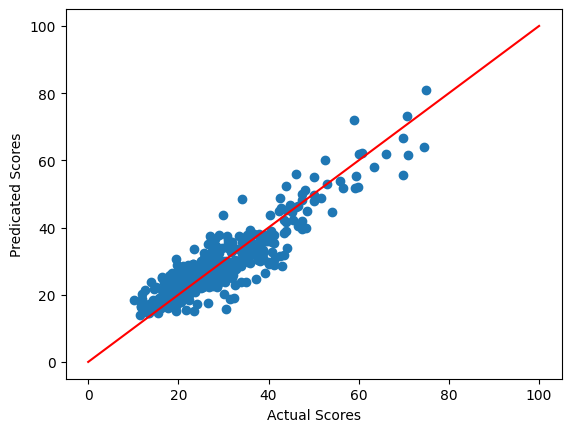

In [ ]:
plt.scatter(Y_test,y_rfr_pred )
plt.plot([0,10,20,30,40,50,60,70,80,90,100],[0,10,20,30,40,50,60,70,80,90,100],c='red')
plt.xlabel('Actual Scores')
plt.ylabel('Predicated Scores')
plt.show()